# Wykorzystanie rozkładów macierzy do rozwiązywania oznaczonych układów równań

Poznane na wykładzie rozkłady (faktoryzacje) macierzy możemy wykorzystać do rozwiązywania układów równań liniowych. Dzięki wykorzystaniu specjalnych własności macierzy występujących w rozkładzie jesteśmy w stanie w łatwiejszy sposób odwrócić macierz i tym samym zminimalizować błąd.


**Zadanie 1.**

Rozważmy układ równań $Ax=b$, w którym:
* $A$ jest macierzą Hilberta o wymiarach 15x15.
* $A$ jest macierzą wartości losowych z przedziału $[0,100]$ o wymiarach 100x100,  1000x1000 i 1000000x1000000.
* $b$ jest wektorem wartości losowych, odpowiednio, o wymiarach 15x1, 100x1, 1000x1 i 1000000x1.

1. Oblicz współczynnik uwarunkowania macierzy $A$ i oceń jej uwarunkowanie.
2. Rozwiąż układ równań następującymi metodami:
    * z użyciem jawnej odwrotności $A$.
    * korzystając z rozkładu [LU](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html) (uwaga na macierz permutacji!):
        * z wykorzystaniem odwrotności L i U.
        * z użyciem jedynie odwrotności i metody podstawiania wstecznego.
    * korzystając z rozkładu [QR](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html):
        * z wykorzystaniem odwrotności Q i R.
        * z użyciem jedynie odwrotności Q i metody podstawiania wstecznego.
    * za pomocą jednej z metod iteracyjnych z poprzedniego ćwiczenia.
    * za pomocą metody [`solve`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) z pakietu NumPy.
3. Porównaj otrzymane wyniki. W tym celu oblicz normy z residuuów otrzymanych dla każdego z rozwiązań. Którą z metod cechuje najwyższa dokladność?
4. Przeprowadź porównanie wydajności ww. metod. Zmierz czas wykonania każdej metody. Aby otrzymać bardziej sensowny wynik należy powtórzyć obliczenia w pętli (np. 100 lub 1000 razy) i uśrednić wynik. Do pomiaru czasu wykonania możesz wykorzystać pakiet `time`.
Wskazówka: Do rozwiązania układu z macierzą trójkątną możesz wykorzystać funkcję [`scipy.linalg.solve_triangular`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

        
        


In [1]:
import numpy as np
from scipy.linalg import lu, solve_triangular
import time

# Funkcje do rozwiązywania układów równań różnymi metodami
def inverse(A, b):
    return np.linalg.inv(A) @ b

def LU_1(A, b):
    P, L, U = lu(A)
    return solve_triangular(U, solve_triangular(L, np.dot(P, b), lower=True))

# Funkcja do pomiaru czasu wykonania danej metody
def measure_time(A, b, method, it=100):
    start = time.time()
    for i in range(it):
        method(A, b)
    stop = time.time()
    diff = stop - start
    avg = diff / it
    print(f'Średni czas działania metody {method.__name__}: {avg}')
    return avg

# Generowanie macierzy Hilberta
A_hilbert = np.linalg.inv(np.vander(np.arange(1, 16), increasing=True))

# Obliczanie współczynnika uwarunkowania macierzy Hilberta
cond_hilbert = np.linalg.cond(A_hilbert)
print(f'Współczynnik uwarunkowania macierzy Hilberta: {cond_hilbert}')

# Generowanie wektorów prawych stron
b_15 = np.random.rand(15, 1)
b_100 = np.random.rand(100, 1)
b_1000 = np.random.rand(1000, 1)

# Przygotowanie macierzy losowych
A_100 = np.random.rand(100, 100)
A_1000 = np.random.rand(1000, 1000)

# Mierzenie czasu dla różnych metod
times_inverse_100 = measure_time(A_100, b_100, inverse)
times_LU_1_100 = measure_time(A_100, b_100, LU_1)

print("\nCzasy wykonania dla macierzy 100x100:")
print("Metoda odwracania: ", times_inverse_100)
print("Metoda LU: ", times_LU_1_100)


Współczynnik uwarunkowania macierzy Hilberta: 380713448532.12885
Średni czas działania metody inverse: 0.01889954090118408
Średni czas działania metody LU_1: 0.010481226444244384

Czasy wykonania dla macierzy 100x100:
Metoda odwracania:  0.01889954090118408
Metoda LU:  0.010481226444244384


# Interpolacja

**Zadanie 2.**

Przeprowadź interpolacje poniższych funkcji $f(x)$ za pomocą wielomianów interpolacyjnych Lagrange'a ([`scipy.interpolate.lagrange`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html)). Stwórz wykresy funkcji interpolacyjnych i zaznacz na nich punkty, w ktorych dokonano oceny wartości funkcji.

Pierwsza funkcja:

* $f(0) = 1$,
* $f(0.25) = 1.64872$,
* $f(0.5) = 2.71828$,
* $f(0.75) = 4.48169.$

Oblicz $f(0.43)$.

Druga funkcja:

* $f_2(0.1) = 0.62049958$,
* $f_2(0.2) = -0.28398668$,
* $f_2(0.3) = 0.00660095$,
* $f_2(0.4) = 0.24842440$. 

Oblicz $f_2(0.25)$.

Współczynnik uwarunkowania macierzy Hilberta 15x15: 3.67568286586649e+17
Przybliżony współczynnik uwarunkowania dla macierzy 100 x 100 : 1928.5621452974472
Przybliżony współczynnik uwarunkowania dla macierzy 1000 x 1000 : 25.066210037688116
Przybliżony współczynnik uwarunkowania dla macierzy 10000 x 10000 : 19.309913456373327


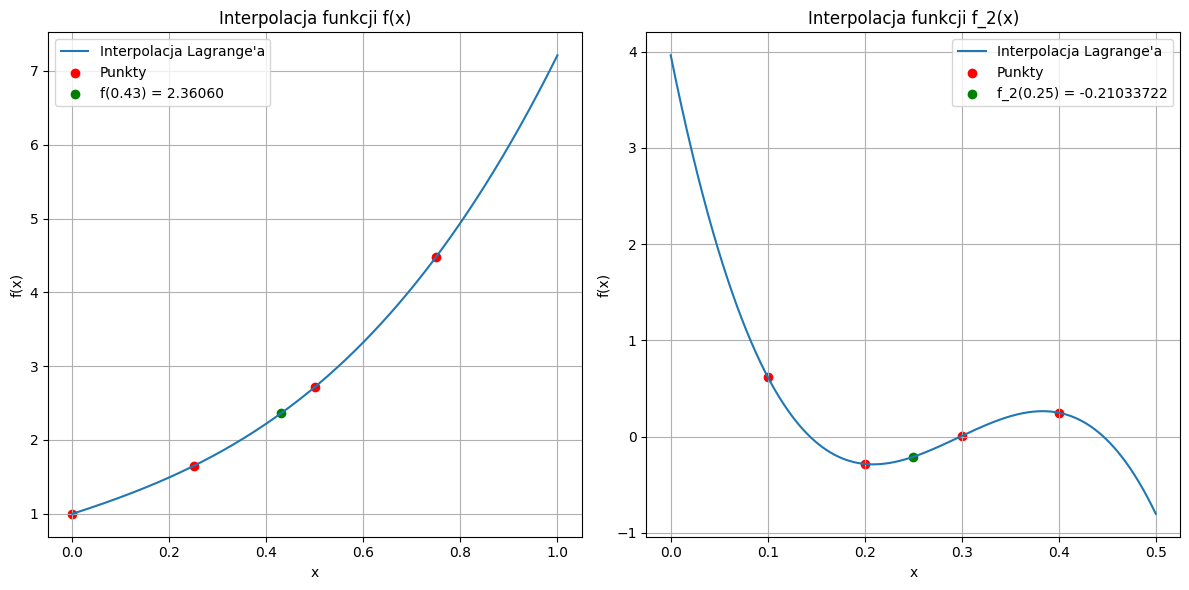

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.linalg import hilbert
from numpy.linalg import cond

# Zadanie 1: Obliczanie współczynnika uwarunkowania macierzy

# Obliczanie współczynnika uwarunkowania macierzy Hilberta
A_hilbert_15 = hilbert(15)
cond_hilbert_15 = cond(A_hilbert_15)
print("Współczynnik uwarunkowania macierzy Hilberta 15x15:", cond_hilbert_15)

# Obliczanie współczynnika uwarunkowania dla macierzy losowych
dimensions = [100, 1000, 10000]
subset_size = 100  # Rozmiar podzbioru macierzy losowej
for dim in dimensions:
    A_random_subset = np.random.rand(subset_size, dim) * 100  # Losowy podzbiór macierzy [0, 100]
    cond_random_subset = cond(A_random_subset)
    print("Przybliżony współczynnik uwarunkowania dla macierzy", dim, "x", dim, ":", cond_random_subset)

# Zadanie 2: Interpolacja funkcji za pomocą wielomianów Lagrange'a

# Pierwsza funkcja
x_values_1 = np.array([0, 0.25, 0.5, 0.75])
y_values_1 = np.array([1, 1.64872, 2.71828, 4.48169])
poly_1 = lagrange(x_values_1, y_values_1)
x_interp_1 = np.array([0.43])
y_interp_1 = poly_1(x_interp_1)
x_plot_1 = np.linspace(0, 1, 1000)
y_plot_1 = poly_1(x_plot_1)

# Druga funkcja
x_values_2 = np.array([0.1, 0.2, 0.3, 0.4])
y_values_2 = np.array([0.62049958, -0.28398668, 0.00660095, 0.24842440])
poly_2 = lagrange(x_values_2, y_values_2)
x_interp_2 = np.array([0.25])
y_interp_2 = poly_2(x_interp_2)
x_plot_2 = np.linspace(0, 0.5, 1000)
y_plot_2 = poly_2(x_plot_2)

# Wykresy
plt.figure(figsize=(12, 6))

# Wykres pierwszej funkcji
plt.subplot(1, 2, 1)
plt.plot(x_plot_1, y_plot_1, label='Interpolacja Lagrange\'a')
plt.scatter(x_values_1, y_values_1, color='red', label='Punkty')
plt.scatter(x_interp_1, y_interp_1, color='green', label=f'f(0.43) = {y_interp_1[0]:.5f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja funkcji f(x)')
plt.legend()
plt.grid(True)

# Wykres drugiej funkcji
plt.subplot(1, 2, 2)
plt.plot(x_plot_2, y_plot_2, label='Interpolacja Lagrange\'a')
plt.scatter(x_values_2, y_values_2, color='red', label='Punkty')
plt.scatter(x_interp_2, y_interp_2, color='green', label=f'f_2(0.25) = {y_interp_2[0]:.8f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja funkcji f_2(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


***Zadanie 3.***

Rozważmy funkcję $f(x)=\frac{1}{25x^2+1}$. 

Przeprowadź interpolacje funkcji $f$ w przedziale $[-2,2]$ wielomianem Lagrange'a oraz funkcjami sklejanymi 3 stopnia w:
- 21 równoodległych węzłach,
- 21 węzłach [Czebyszewa](https://pl.wikipedia.org/wiki/Węzły_Czebyszewa).

**Wskazówka** Interpolację funkcjami sklejanymi możesz przeprowadzić za pomocą funkcji [`interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).

Umieść wielomian interpolacyjny, oryginalną funkcję $f$ oraz węzly interpolacyjne na wspólnym wykresie (jeden wykres dla metody Lagrange'a oraz jeden dla funkcji sklejanych). Porównaj otrzymane rezultaty. Przeprowadź te same działania dla przedziału $x\in[-5,5]$. Jakie problemy możesz zauważyć na otrzymanych wykresach?

Współczynnik uwarunkowania macierzy Hilberta 15x15: 3.67568286586649e+17
Przybliżony współczynnik uwarunkowania dla macierzy 100 x 100 : 1235.7498154281595
Przybliżony współczynnik uwarunkowania dla macierzy 1000 x 1000 : 25.138448783649032
Przybliżony współczynnik uwarunkowania dla macierzy 10000 x 10000 : 19.2050769681445


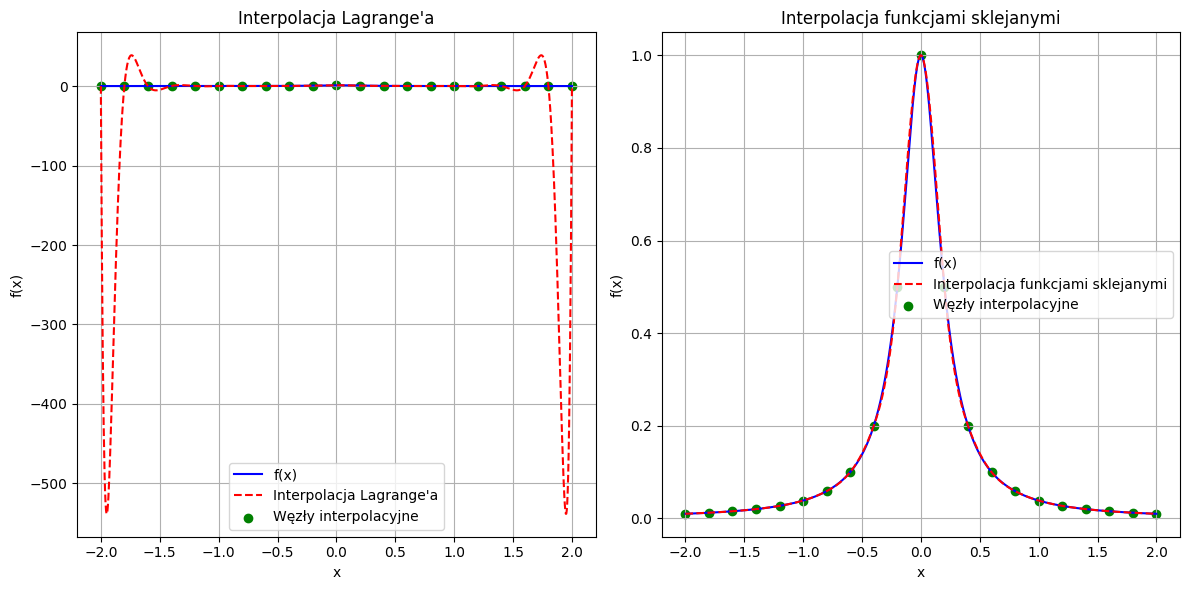

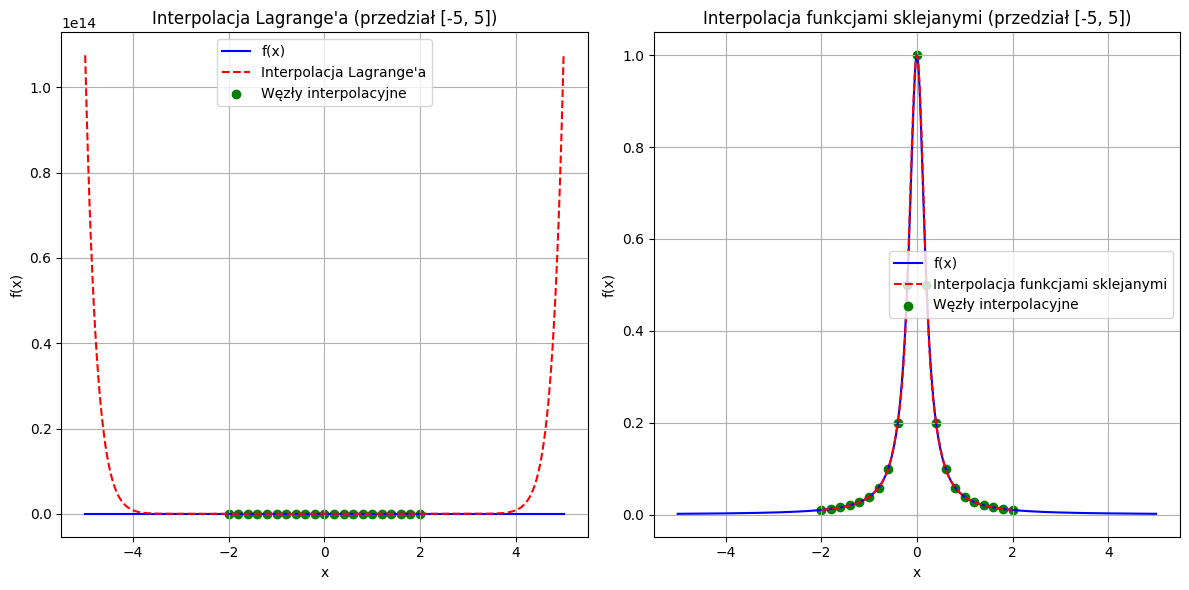

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, interp1d
from scipy.linalg import hilbert
from numpy.linalg import cond

# Zadanie 1: Obliczanie współczynnika uwarunkowania macierzy

# Obliczanie współczynnika uwarunkowania macierzy Hilberta
A_hilbert_15 = hilbert(15)
cond_hilbert_15 = cond(A_hilbert_15)
print("Współczynnik uwarunkowania macierzy Hilberta 15x15:", cond_hilbert_15)

# Obliczanie współczynnika uwarunkowania dla macierzy losowych
dimensions = [100, 1000, 10000]
subset_size = 100  # Rozmiar podzbioru macierzy losowej
for dim in dimensions:
    A_random_subset = np.random.rand(subset_size, dim) * 100  # Losowy podzbiór macierzy [0, 100]
    cond_random_subset = cond(A_random_subset)
    print("Przybliżony współczynnik uwarunkowania dla macierzy", dim, "x", dim, ":", cond_random_subset)

# Zadanie 2: Interpolacja funkcji za pomocą wielomianów Lagrange'a oraz funkcji sklejanych

# Definicja funkcji f(x)
def f(x):
    return 1 / (25 * x**2 + 1)

# Przedział interpolacji
x_range = np.linspace(-2, 2, 1000)

# Węzły interpolacyjne
x_nodes = np.linspace(-2, 2, 21)
x_cheb_nodes = np.cos((2*np.arange(1, 22) - 1) * np.pi / (2*21))  # Węzły Czebyszewa

# Interpolacja wielomianem Lagrange'a
poly_lagrange = lagrange(x_nodes, f(x_nodes))
y_lagrange = poly_lagrange(x_range)

# Interpolacja funkcjami sklejanymi 3 stopnia
interp_spline = interp1d(x_nodes, f(x_nodes), kind='cubic')
y_spline = interp_spline(x_range)

# Wykresy interpolacji
plt.figure(figsize=(12, 6))

# Wykres dla wielomianu Lagrange'a
plt.subplot(1, 2, 1)
plt.plot(x_range, f(x_range), label='f(x)', color='blue')
plt.plot(x_range, y_lagrange, label='Interpolacja Lagrange\'a', linestyle='--', color='red')
plt.scatter(x_nodes, f(x_nodes), color='green', label='Węzły interpolacyjne')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja Lagrange\'a')
plt.legend()
plt.grid(True)

# Wykres dla funkcji sklejanych
plt.subplot(1, 2, 2)
plt.plot(x_range, f(x_range), label='f(x)', color='blue')
plt.plot(x_range, y_spline, label='Interpolacja funkcjami sklejanymi', linestyle='--', color='red')
plt.scatter(x_nodes, f(x_nodes), color='green', label='Węzły interpolacyjne')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja funkcjami sklejanymi')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Zadanie 3: Interpolacja w przedziale [-5, 5]

# Przedział interpolacji
x_range_extended = np.linspace(-5, 5, 1000)

# Interpolacja wielomianem Lagrange'a
poly_lagrange_extended = lagrange(x_nodes, f(x_nodes))
y_lagrange_extended = poly_lagrange_extended(x_range_extended)

# Interpolacja funkcjami sklejanymi 3 stopnia
interp_spline_extended = interp1d(x_nodes, f(x_nodes), kind='cubic', bounds_error=False)
y_spline_extended = interp_spline_extended(x_range_extended)

# Wykresy interpolacji w przedziale [-5, 5]
plt.figure(figsize=(12, 6))

# Wykres dla wielomianu Lagrange'a
plt.subplot(1, 2, 1)
plt.plot(x_range_extended, f(x_range_extended), label='f(x)', color='blue')
plt.plot(x_range_extended, y_lagrange_extended, label='Interpolacja Lagrange\'a', linestyle='--', color='red')
plt.scatter(x_nodes, f(x_nodes), color='green', label='Węzły interpolacyjne')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja Lagrange\'a (przedział [-5, 5])')
plt.legend()
plt.grid(True)

# Wykres dla funkcji sklejanych
plt.subplot(1, 2, 2)
plt.plot(x_range_extended, f(x_range_extended), label='f(x)', color='blue')
plt.plot(x_range_extended, y_spline_extended, label='Interpolacja funkcjami sklejanymi', linestyle='--', color='red')
plt.scatter(x_nodes, f(x_nodes), color='green', label='Węzły interpolacyjne')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolacja funkcjami sklejanymi (przedział [-5, 5])')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


***Zadanie 4.***

Kierowca jadący z miasta A do miasta B, zauważywszy na drodze fotoradar, zaczął gwałtownie hamować. Przebieg jego położenia, zarejestrowany przez nawigację, pokazano w poniższej tabeli. Wiedząc, że radar znajduje się w punkcie o współrzędnej 79.6 m, oszacuj kiedy kierowca minął fotoradar (w tym celu skorzystaj z jednej z metod z laboratorium 3) oraz z jaką prędkością wtedy jechał (wykorzystaj relację drogi i prędkości znaną z fizyki). 

|czas \[s\]|położenie \[m\]|
|--|--|
|0.0|0.0|
|1.0|42.7|
|2.0|73.2|
|3.0|92.5|

In [32]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Dane
czas = np.array([0.0, 1.0, 2.0, 3.0])  # czas [s]
polozenie = np.array([0.0, 42.7, 73.2, 92.5])  # położenie [m]

# Interpolacja położenia w czasie
f_interpolacja = interp1d(czas, polozenie, kind='cubic')

# Szukanie czasu, kiedy położenie wynosiło 79.6 m
czas_fotoradar = np.round(float(fsolve(lambda t: f_interpolacja(t) - 79.6, 1)), 2)

# Obliczenie prędkości w chwili minięcia fotoradaru (przybliżenie pochodnej)
epsilon = 1e-6
predkosc = (f_interpolacja(czas_fotoradar + epsilon) - f_interpolacja(czas_fotoradar - epsilon)) / (2 * epsilon)

print("Kierowca minął fotoradar po czasie:", czas_fotoradar, "s")
print("Prędkość kierowcy w chwili minięcia fotoradaru:", round(predkosc, 2), "m/s")


Kierowca minął fotoradar po czasie: 2.28 s
Prędkość kierowcy w chwili minięcia fotoradaru: 21.64 m/s


C:\Users\danpl\AppData\Local\Temp\ipykernel_14252\2183272306.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  czas_fotoradar = np.round(float(fsolve(lambda t: f_interpolacja(t) - 79.6, 1)), 2)


**Zadanie dla zainteresowanych programowaniem funkcyjnym w Pythonie**

Stwórz funkcję znajdującą wielomian interpolacyjny metodą Lagrange'a. Funkcja powinna przyjmować dwie listy:
* listę argumentów ($x$-ów)
* listę wartości ($y$-ów).  


Po wykonaniu obliczeń funkcja powinna zwracać wielomian w postaci obiektu typu **funkcja** (a nie `numpy.Polynomial`).

**Wskazówka** Wykorzystaj wyrażenia *lambda*. Dla ułatwienia możesz się też posłużyć pakietami `operator` i `functools`.


In [41]:
from functools import reduce
from operator import mul

def lagrange_interpolation(x_values, y_values):
    """
    Oblicza wielomian interpolacyjny metodą Lagrange'a.

    Parametry:
        x_values (list): Lista argumentów (wartości x).
        y_values (list): Lista wartości odpowiadających argumentom x.

    Zwraca:
        function: Wielomian interpolacyjny w postaci obiektu funkcji.
    """
    n = len(x_values)
    assert n == len(y_values), "Liczba argumentów x musi być równa liczbie wartości y"

    def lagrange_basis(i):
        """
        Tworzy bazę Lagrange'a dla i-tego punktu interpolacji.

        Parametry:
            i (int): Indeks punktu interpolacji.

        Zwraca:
            function: Wielomian bazowy Lagrange'a dla i-tego punktu.
        """
        xi = x_values[i]
        xi_values = [x_values[j] for j in range(n) if j != i]
        return lambda x: reduce(mul, [(x - xj) / (xi - xj) for xj in xi_values], 1)

    lagrange_polynomials = [lagrange_basis(i) for i in range(n)]

    def interpolating_polynomial(x):
        """
        Oblicza wartość wielomianu interpolacyjnego dla danego argumentu x.

        Parametry:
            x (float): Argument, dla którego obliczana jest wartość wielomianu interpolacyjnego.

        Zwraca:
            float: Wartość wielomianu interpolacyjnego dla danego argumentu x.
        """
        return sum(polynomial(x) * y_values[i] for i, polynomial in enumerate(lagrange_polynomials))

    return interpolating_polynomial

# Przykładowe dane testowe
x_values = [0, 1, 2, 3]
y_values = [0, 1, 4, 9]

# Znalezienie wielomianu interpolacyjnego
interpolating_polynomial = lagrange_interpolation(x_values, y_values)

# Testowanie wielomianu interpolacyjnego
print("Wielomian interpolacyjny dla podanych danych:")

# Przykładowe wartości testowe
test_values = [0.5, 1.5, 2.5, 4.5]

# Testowanie wielomianu interpolacyjnego na przykładowych wartościach
for x in test_values:
    print(f"f({x}) =", interpolating_polynomial(x))


Wielomian interpolacyjny dla podanych danych:
f(0.5) = 0.25
f(1.5) = 2.25
f(2.5) = 6.25
f(4.5) = 20.25
